In [1]:
#import libraries

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# Indicators of Anxiety and Depression Based on Reported Frequency of Symptoms


## Introduction
On March 11, 2020 the World Health Organization declared COVID-19 a pandemic. In the weeks that followed many U.S cities limited gatherings and went into lockdown to prevent the spread of the virus. Many were isolated in their homes due to sickness or limited opportunity to work. 

## Context
In April 2020, the Household Pulse Survey was created to collect data to measure household experiences during the coronavirus pandemic. The survey focuses on the mental health impact as well as socioeconomic factors. This is still an ongoing survey as of March 2022. (last gathered data on 01/10/22)

<details>
    <summary>Survey Details</summary>

##### The National Center for Health Statistics conducted this survey in 3 phases as outlined below.

        1. Phase 1 04/23/2020 - 07/21/2020
        2. Phase 2 08/19/2020 - 10/28/2020
        3. Phase 3 10/28/2020 - 12/21/2020 
        4. Phase 3 01/06/2021 - 03/29/2021
        5. Phase 3.1 04/14/2021 - 07/05/2021
        6. Phase 3.2 07/21/2021 - 10/11/2021
        7. Phase 3.3 12/01/2021 - 02/07/2022

Note: At each phase, the survey asked about the "last 7 days". Beginning in Phase 3.2, the survey asked about the "last two weeks". It is unknown why Phase 3 has been split.  
#### Survey Questions
Adapted PHQ-2 questions:

Over the last 7 days, how often have you been bothered by … having little interest or pleasure in doing things? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Over the last 7 days, how often have you been bothered by … feeling down, depressed, or hopeless? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Adapted GAD-2 questions:

Over the last 7 days, how often have you been bothered by the following problems … Feeling nervous, anxious, or on edge? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Over the last 7 days, how often have you been bothered by the following problems … Not being able to stop or control worrying? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer

#### Scoring
For each scale, the answers are assigned a numerical value: not at all = 0, several days = 1, more than half the days = 2, and nearly every day = 3. The two responses for each scale are added together.

A sum equal to three or greater on the PHQ-2 has been shown to be associated with diagnoses of major depressive disorder.

A sum equal to three or greater on the GAD-2 has been shown to be associated with diagnoses of generalized anxiety disorder.
</details>

<details>
    <summary>Source </summary>
    
    - Dataset: https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp
    - How this data was used: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm
</details>         

# Objective

1. Isolate and explore statistics in the state of Texas
2. Find trends across different age groups.
3. Find trends across different race groups.
4. Look at changes in percentage of anxiety, depression, both across the different survey phases. 

## Load the dataset

In [2]:
df = pd.read_csv('AnxietyData.csv', parse_dates=['Time Period Start Date', 'Time Period End Date'])

In [3]:
df.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN


## Column Overview

In [4]:
df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

### Imported columns:

1. **Indicator**: The indicator that is associated to a symptom (anxiety, depression, or both)
2. **Group** 
3. **State**
4. **Subgroup**
5. **Phase**
6. **Time Period**
7. **Time Period Label**
8. **Time Period Start Date**
9. **Time Period End Date**
10. **Value**: Percentage of adults whose reported symptoms are associated with a diagnoses (anxiety, depression, or both)
11. **Low CI**
12. **High CI**
13. **Confidence Interval**: This dataset has a confidence interval of 95%. "Confidence intervals included .. only reflect the potential for sampling error." 
14. **Quartile Range**

In [5]:
df['Indicator'].unique()

array(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder',
       'Symptoms of Anxiety Disorder or Depressive Disorder'],
      dtype=object)

In [6]:
df['Group'].unique()

#national estimate in Group column seems different than rest of values

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [7]:
df['State'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
df['Subgroup'].unique()

#The article in which this dataset was used, the subgroup categories were split into y axis categories 
#IDEA: create new columns out of each subgroup (age, state, race, orientation)

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [9]:
df['Phase'].unique()

#considering replacing the values that are not 1,2,3 by using the date ranges

array(['1', '-1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1',
       '3.2', '3.3'], dtype=object)

In [10]:
df['Time Period Label'].unique()

array(['Apr 23 - May 5, 2020', 'May 7 - May 12, 2020',
       'May 14 - May 19, 2020', 'May 21 - May 26, 2020',
       'May 28 - June 2, 2020', 'June 4 - June 9, 2020',
       'June 11 - June 16, 2020', 'June 18 - June 23, 2020',
       'June 25 - June 30, 2020', 'July 2 - July 7, 2020',
       'July 9 - July 14, 2020', 'July 16 - July 21, 2020',
       'July 22 - Aug 18, 2020', 'Aug 19 - Aug 31, 2020',
       'Sep 2 - Sep 14, 2020', 'Sep 16 - Sep 28, 2020',
       'Sep 30 - Oct 12, 2020', 'Oct 14 - Oct 26, 2020',
       'Oct 28 - Nov 9, 2020', 'Nov 11 - Nov 23, 2020',
       'Nov 25 - Dec 7, 2020', 'Dec 9 - Dec 21, 2020',
       'Dec 22, 2020 - Jan 5, 2021', 'Jan 6 - Jan 18, 2021',
       'Jan 20 - Feb 1, 2021', 'Feb 3 - Feb 15, 2021',
       'Feb 17 - Mar 1, 2021', 'Mar 3 - Mar 15, 2021',
       'Mar 17 - Mar 29, 2021', 'Mar 30 - Apr 13, 2021',
       'Apr 14 - Apr 26, 2021', 'Apr 28 - May 10, 2021',
       'May 12 - May 24, 2021', 'May 26 - Jun 7, 2021',
       'Jun 9 - Jun 21, 2021

In [11]:
#Data collection starts 04/23/2020
df['Time Period Start Date'].min()

Timestamp('2020-04-23 00:00:00')

In [12]:
#Data collection ends 01/10/2022
df['Time Period End Date'].max()

Timestamp('2022-01-10 00:00:00')

## Data Formatting & Cleaning

### Check for missing values

In [13]:
df.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      297
Low CI                     297
High CI                    297
Confidence Interval        297
Quartile Range            2862
dtype: int64

In [14]:
#check NA's in the Value column
filtered_df = df[df['Value'].isna()]

In [15]:
filtered_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
2520,Symptoms of Depressive Disorder,National Estimate,United States,United States,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2521,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2522,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2523,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2524,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN


In [16]:
#Groups that have NA's in Value column
filtered_df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status'], dtype=object)

In [17]:
#function takes a value from the Group column as the parameter and returns the count of NA

def check_na_count(group):
    groupdf = df[df['Group'] == group]
    length_of_na = len(groupdf[groupdf['Value'].isna()])

    length_of_df = len(groupdf)

    na_as_percentage = round((length_of_na/length_of_df),2)

    outputstring = f"Out of {length_of_df}, there are {length_of_na} missing values. {na_as_percentage}% missing" 

    return outputstring

In [18]:
check_na_count('National Estimate')

'Out of 138, there are 15 missing values. 0.11% missing'

In [19]:
check_na_count('By Age')

'Out of 966, there are 105 missing values. 0.11% missing'

In [20]:
check_na_count('By Sex')

'Out of 276, there are 30 missing values. 0.11% missing'

In [21]:
check_na_count('By Race/Hispanic ethnicity')

'Out of 690, there are 75 missing values. 0.11% missing'

In [22]:
check_na_count('By Education')

'Out of 552, there are 60 missing values. 0.11% missing'

In [23]:
check_na_count('By Disability status')

'Out of 96, there are 12 missing values. 0.12% missing'

##### The missing percentages are not significant enough to clean up these columns. Proceeding with data frame as it is.

### Column Addition: Phases

In [24]:
#Create a new column with newly assigned Phase values (call it NewPhase)

#create a list of conditions
conditions = [ 
    (df['Time Period Start Date'] >= '2020-04-23') & (df['Time Period End Date'] <='2020-07-21'), #1. Phase 1   04/23/2020 - 07/21/2020
    ((df['Time Period Start Date'] >= '2020-08-19') & (df['Time Period End Date'] <='2020-10-26')), #2. Phase 2   08/19/2020 - 10/26/2020
    ((df['Time Period Start Date'] >= '2020-10-28') & (df['Time Period End Date'] <='2020-12-21')), #3. Phase 3   10/28/2020 - 12/21/2020
    ((df['Time Period Start Date'] >= '2021-01-06') & (df['Time Period End Date'] <= '2021-03-29')), #4. Phase 3 (con't) 01/06/2021 - 03/29/2021   
    ((df['Time Period Start Date'] >= '2021-04-14') & (df['Time Period End Date'] <='2021-07-05')), #5. Phase 3.1 04/14/2021 - 07/05/2021
    ((df['Time Period Start Date'] >= '2021-07-21') & (df['Time Period End Date'] <='2021-10-11')), #6. Phase 3.2 07/21/2021 - 10/11/2021
    ((df['Time Period Start Date'] >= '2021-12-01') & (df['Time Period End Date'] <='2022-02-07'))  #7 Phase 3.3 Phase 3.3 12/01/2021 - 02/07/2022
    
    ]
#create a list of the values we want to assign for each condition
values = ['Phase 1','Phase 2','Phase 3','Phase 4', 'Phase 5','Phase 6', 'Phase 7']

#create a new column and use np.select to assign values to it using our lists as arguments
df['Phases'] = np.select(conditions, values)

#display updated dataframe
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


#### Evaluating missing values in Phases 

In [25]:
df['Phases'].unique()

array(['Phase 1', '0', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5',
       'Phase 6', 'Phase 7'], dtype=object)

In [26]:
#exploring what element '0' means in Phases column

zero_phase_value = df[df['Phases'] == '0']

In [27]:
zero_phase_value['Time Period Start Date'].unique()

#these dates correspond to Break periods

array(['2020-07-22T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-10-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [28]:
zero_phase_value['Time Period End Date'].unique()

#these dates correspond to Break periods

array(['2020-08-18T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-07-20T00:00:00.000000000',
       '2021-11-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [29]:
zero_phase_value['Value']

#These break periods have no data reported since no surveys were taken during these times

2520   NaN
2521   NaN
2522   NaN
2523   NaN
2524   NaN
        ..
8818   NaN
8819   NaN
8820   NaN
8821   NaN
8822   NaN
Name: Value, Length: 297, dtype: float64

In [30]:
#only keep the rows in which surveys were conducted

#removing unwanted rows by filtering
df = df[df['Phases'] != '0']

#display updated dataframe
df.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


### Evaluating Subgroup values to single out (NOT DONE HERE, NOT SURE HOW YET)

In [31]:
#exploring what National Estimate and United States values refer to in Group and State
# df[df['Group'] == 'National Estimate']

#123 rows 

In [33]:
"""
df['Subgroup'].unique()

#123 rows

"""

"\ndf['Subgroup'].unique()\n\n#123 rows\n\n"

In [34]:
"""

#Create a new column for Age subgroups

#'18 - 29 years', '30 - 39 years', '40 - 49 years',
#'50 - 59 years', '60 - 69 years', '70 - 79 years',

#create a list of conditions
conditions = [ 
    (df['Subgroup'] == '18 - 29 years'), #1 18 - 29 years
    (df['Subgroup'] == '30 - 39 years'), #2 30 - 39 years
    (df['Subgroup'] == '40 - 49 years'), #3 40 - 49 years
    (df['Subgroup'] == '50 - 59 years'), #4 50 - 59 years   
    (df['Subgroup'] == '60 - 69 years'), #5 60 - 69 years
    (df['Subgroup'] == '70 - 79 years') #6 70 - 79 years  
    ]
#create a list of the values we want to assign for each condition
values = ['18 - 29 years','30 - 39 years','40 - 49 years','50 - 59 years', '60 - 69 years','70 - 79 years']

#create a new column and use np.select to assign values to it using our lists as arguments
df['Ages'] = np.select(conditions, values)

#display updated dataframe
df.head()


"""


"\n\n#Create a new column for Age subgroups\n\n#'18 - 29 years', '30 - 39 years', '40 - 49 years',\n#'50 - 59 years', '60 - 69 years', '70 - 79 years',\n\n#create a list of conditions\nconditions = [ \n    (df['Subgroup'] == '18 - 29 years'), #1 18 - 29 years\n    (df['Subgroup'] == '30 - 39 years'), #2 30 - 39 years\n    (df['Subgroup'] == '40 - 49 years'), #3 40 - 49 years\n    (df['Subgroup'] == '50 - 59 years'), #4 50 - 59 years   \n    (df['Subgroup'] == '60 - 69 years'), #5 60 - 69 years\n    (df['Subgroup'] == '70 - 79 years') #6 70 - 79 years  \n    ]\n#create a list of the values we want to assign for each condition\nvalues = ['18 - 29 years','30 - 39 years','40 - 49 years','50 - 59 years', '60 - 69 years','70 - 79 years']\n\n#create a new column and use np.select to assign values to it using our lists as arguments\ndf['Ages'] = np.select(conditions, values)\n\n#display updated dataframe\ndf.head()\n\n\n"

In [ ]:
""" Ages = df[df['Ages'] != '0']
Ages['State'].unique() """

array(['United States'], dtype=object)

## Cleaned Dataframe

In [37]:
#create a new df with relevant columns
clean_df = df[['Indicator','State','Group', 'Subgroup','Phases', 'Time Period Label', 'Value']]

clean_df

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
0,Symptoms of Depressive Disorder,United States,National Estimate,United States,Phase 1,"Apr 23 - May 5, 2020",23.5
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.4
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 7,"Dec 29, 2021 - Jan 10, 2022",25.5


In [38]:
clean_df = clean_df[clean_df['Group'] != 'National Estimate']
clean_df

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4
...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.4
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 7,"Dec 29, 2021 - Jan 10, 2022",25.5


In [41]:
states_only = clean_df[clean_df['State'] != 'United States']

states_only.head(3)

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
19,Symptoms of Depressive Disorder,Alabama,By State,Alabama,Phase 1,"Apr 23 - May 5, 2020",18.6
20,Symptoms of Depressive Disorder,Alaska,By State,Alaska,Phase 1,"Apr 23 - May 5, 2020",19.2
21,Symptoms of Depressive Disorder,Arizona,By State,Arizona,Phase 1,"Apr 23 - May 5, 2020",22.4


In [40]:
us_only = clean_df[clean_df['State'] == 'United States']

us_only.head(3)

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8


# Visualize Data

## United States Statistics

In [42]:
#Assign colors to each Indicator *U.S df only*


#create a list of conditions
color_conditions = [ 
    (us_only['Indicator'] == 'Symptoms of Anxiety Disorder'), #1
    (us_only['Indicator'] == 'Symptoms of Depressive Disorder'), #2
    (us_only['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder'), #3
    ]
#create a list of the values we want to assign for each condition
colors = ['Red','Blue','Green']

#use np.select to assign values 
us_indicator_colors = np.select(color_conditions, colors)

#display 
us_indicator_colors

array(['Blue', 'Blue', 'Blue', ..., 'Green', 'Green', 'Green'],
      dtype='<U5')

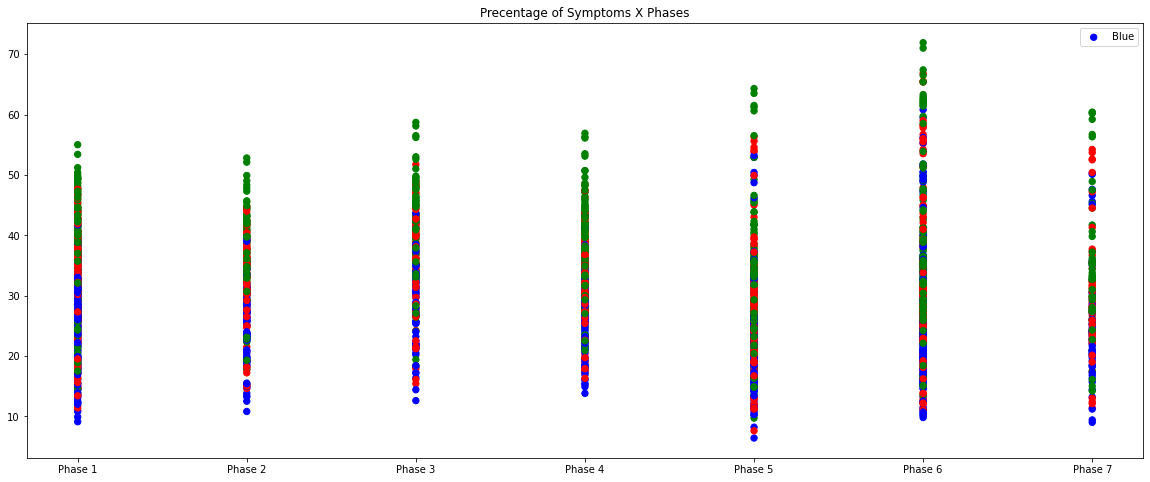

In [44]:
#Percentage of Americans that show symptoms

plt.figure(figsize= (20,8))

plt.title("Precentage of Symptoms X Phases")

#tell it which values to plot
plt.scatter(x = us_only['Phases'], y = us_only['Value'], s = 40, c = us_indicator_colors)

#create a legend
plt.legend(us_indicator_colors)

#display figure
plt.show()

In [75]:
Ages = ['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years', '60 - 69 years', '70 - 79 years']
Ages

['18 - 29 years',
 '30 - 39 years',
 '40 - 49 years',
 '50 - 59 years',
 '60 - 69 years',
 '70 - 79 years']

C:\Users\17134\anaconda3\envs\datavenv\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: setting an array element with a sequence.

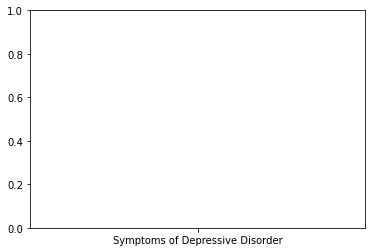

In [89]:
plt.bar(x = us_only['Indicator'], y = us_only ['Value'], width = 15, height= 10)

plt.show()

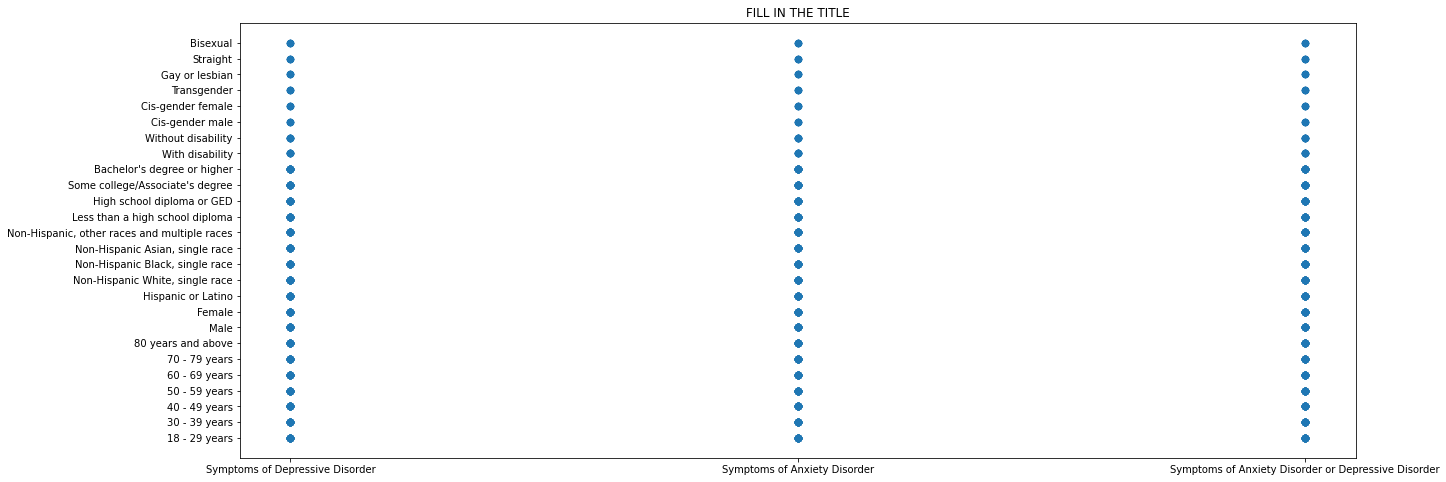

In [85]:
#Percentage of Americans that show symptoms

plt.figure(figsize= (20,8))

plt.title("FILL IN THE TITLE")

#tell it which values to plot
plt.scatter(y = us_only['Subgroup'], x = us_only['Indicator'], s = 40)

#create a legend
#plt.legend(us_indicator_colors)

#display figure
plt.show()

**There is a higher percentage of Americans showing symptoms of BOTH anxiety and depression across the board**

## Texas Statistics

In [54]:
#Assign colors to each Indicator *texas df only*


#create a list of conditions
color_conditions = [ 
    (states_only['Indicator'] == 'Symptoms of Anxiety Disorder'), #RED
    (states_only['Indicator'] == 'Symptoms of Depressive Disorder'), #BLUE
    (states_only['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder'), #BLACK
    ]
#create a list of the values we want to assign for each condition
colors = ['Red','Blue','Black']

#use np.select to assign values 
tx_indicator_colors = np.select(color_conditions, colors)

In [55]:
#State of Texas only

states_only_texas = states_only[states_only['Subgroup'] == 'Texas']

states_only_texas.head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
62,Symptoms of Depressive Disorder,Texas,By State,Texas,Phase 1,"Apr 23 - May 5, 2020",24.4
132,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 1,"Apr 23 - May 5, 2020",29.7
202,Symptoms of Anxiety Disorder or Depressive Dis...,Texas,By State,Texas,Phase 1,"Apr 23 - May 5, 2020",34.9
272,Symptoms of Depressive Disorder,Texas,By State,Texas,Phase 1,"May 7 - May 12, 2020",25.7
342,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 1,"May 7 - May 12, 2020",32.4


### Texas Statistics: Trends in Symptoms

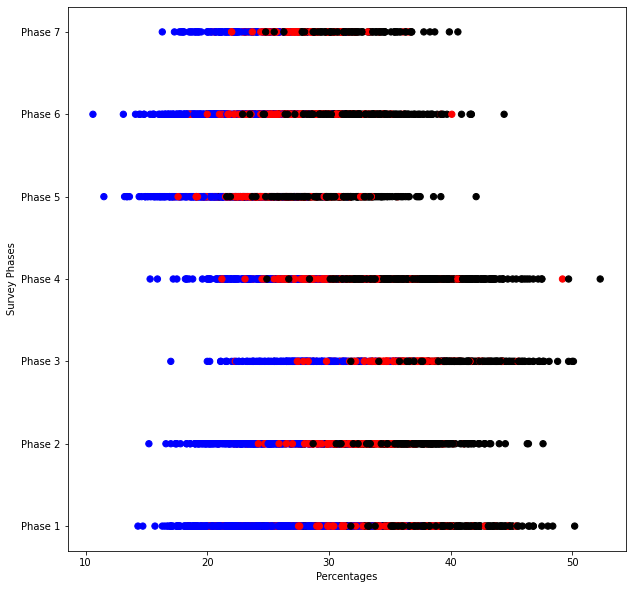

In [60]:
#STATES ONLY TEXAS SUBGROUP = STATES ONLY DF [SUBGROUP] == TEXAS

#plot figure size
plt.figure(figsize= (10, 10))

#tell it which values to plot
plt.scatter(x = states_only['Value'], y = states_only['Phases'], s= 40, c= tx_indicator_colors)

#axis labels
plt.xlabel("Percentages")
plt.ylabel("Survey Phases")

#display plot
plt.show()

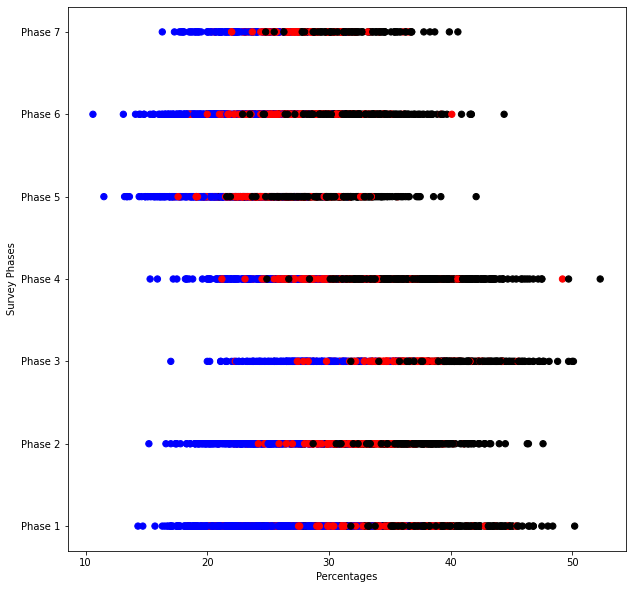

In [58]:
#TEXAS DF = CLEAN DF -> [STATE] == TEXAS

#plot figure size
plt.figure(figsize= (10, 10))

#tell it which values to plot
plt.scatter(x = states_only['Value'], y = states_only['Phases'], s= 40, c= tx_indicator_colors)

#axis labels
plt.xlabel("Percentages")
plt.ylabel("Survey Phases")

#display plot
plt.show()

- **It seems that as time progressed the overall percentage of symptoms decreased in comparison to the beginning of the pandemic**
- **Phase 3 seems significantly higher than the others**

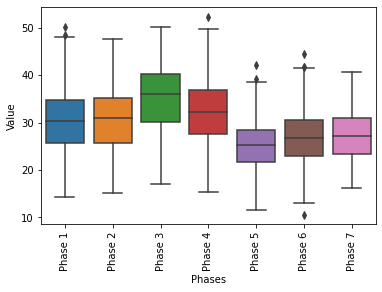

In [62]:
#boxplot test using seaborn

sns.boxplot(x="Phases", y="Value", data=states_only)
plt.xticks(rotation=90)

plt.show()

### Texas Statistics: Trends by Age (WORKING ON THIS)

In [ ]:
#create a Texas df that filters by Age

age_df = df[clean_df['Group'] == 'By Age']

texas_age_df = age_df#[age_df.State == 'Texas']

texas_age_df

#This seems to be pulling in the original df, not the cleaned df. 
#I cant filter Texas only, State column only has United States as a value

C:\Users\17134\AppData\Local\Temp\ipykernel_14748\999313849.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
#plot figure size
plt.figure(figsize= (10, 10))

#tell it which values to plot
plt.scatter(x = , y = , s= 4, c= tx_indicator_colors)

#axis labels
plt.xlabel("")
plt.ylabel("")

#display plot
plt.show()

SyntaxError: invalid syntax (1133060878.py, line 5)

### Texas Statistics: Trends by Race

In [ ]:
#in the Texas df, look at By Race

# Example of a function

In [ ]:
#example
def function_name(parameters):
    # do something
    print("hello!")
    return None

In [ ]:
def double(number):
    output = number+number
    return output

In [ ]:
double(5)

10

In [ ]:
double(15)

30